# Diagnostics

In [ ]:
# You may not have all of the necessary modules loaded
# Use !conda list to see list of loaded modules
# Use !conda install <module> to install a module
# Use !conda update <module> to update a module
# 
# Note: Using pip install <module> does not work with Jupyter environment,
# but works with IDLE

# Load handwritten digits 0   1   2   3   4   5   6   7  8   9

In [1]:
# Use the Keras - high level neural network APIs - to load MNIST data
# https://www.infoworld.com/article/3336192/what-is-keras-the-deep-neural-network-api-explained.html
# https://keras.rstudio.com/reference/dataset_mnist.html
#
# Keras called from Tensor Flow
# https://machinelearningmastery.com/introduction-python-deep-learning-library-tensorflow/
#
# Load the image data into multiple tuples, use the shape property to describe tuples
#

In [2]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Display a number any number from 0 - 59_999

3 index: 52085


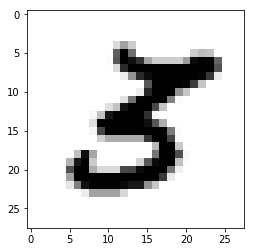

In [3]:
# Use matplotlib to display 28x28 number image
# https://matplotlib.org/
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 52_085 # Select any number up to 59,999
print(y_train[image_index], 'index:', image_index) # label 8
plt.imshow(x_train[image_index], cmap='Greys');

## Keras needs 4D not 3D data so reshape

In [4]:
# Reshape array to 4-dimensions so it can 
# work with the Keras API
n_images_train = x_train.shape[0]
n_images_test = x_test.shape[0]

x_train = x_train.reshape(n_images_train, 28, 28, 1)
x_test = x_test.reshape(n_images_test, 28, 28, 1)
input_shape = (28, 28, 1)

# Make values floats so we get decimals after division
# Normalize RGB codes: divide by max RGB value
x_train = np.float32(x_train) / 255.0
x_test = np.float32(x_test) / 255.0

print('x_train shape:', x_train.shape)
print(n_images_train, 'images in x_train')
print(n_images_test, 'images in x_test')

x_train shape: (60000, 28, 28, 1)
60000 images in x_train
10000 images in x_test


## Build multi-layer model
"convolution" filter, "pool", "convolution" filter again, "pool" again, flatten, add 1024 units fully connected, "dropout" - kill random 20%, final array of 10 units, one per digit, "compile"

In [5]:
# Keras modules provide model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Create a Sequential Model
model = Sequential()
#                                           # Starting image
# Add layers                                #  28 x 28
model.add(Conv2D(32, kernel_size=(7,7),     #  24 x 24 x 32 filtered
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))   #  12 x 12 x 32 cut in half

model.add(Conv2D(64, kernel_size=(5,5),     #   8 x  8 x 64 filtered again 
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))   #   4 x  4 x 64 cut in half

# 4 x 4 x 64 == 2**2 x 2**2 x 2**6  = 2 **10 = 1024
model.add(Flatten())                        # Flatten to 1024 items

model.add(Dense(1024,                       # fully connect each to each
                activation=tf.nn.relu))

model.add(Dropout(0.2))                   # Reduce overfit: drop 20% of units

model.add(Dense(10,                         # 10 answer units 0-9
                activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

'multi-layer model built'

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


'multi-layer model built'

## Step 2 - Train the model:

Train the model - call model.fit , pass in the training data and the expected output. .

After training ends, it reports the final accuracy using the training data.

NOTE: With 10 epochs (iterations), will take about 20 minutes or longer depending on
your system so you may want to reduce the epochs to <= 5

In [6]:
# one "epoch" = one forward pass and one backward pass 
# of all the training examples

model.fit(x=x_train,y=y_train, epochs=10);

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 59s 981us/step - loss: 0.1468 - acc: 0.9566
Epoch 2/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0701 - acc: 0.9792
Epoch 3/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0568 - acc: 0.9837
Epoch 4/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0538 - acc: 0.9850
Epoch 5/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0441 - acc: 0.9878
Epoch 6/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0442 - acc: 0.9886
Epoch 7/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0421 - acc: 0.9897
Epoch 8/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0447 - acc: 0.9898
Epoch 9/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0451 - acc: 0.9903 2s - loss: 0.0446 - a - ETA: 1s - loss
Epoch 1

# Test trained model

In [7]:
x_test.shape

(10000, 28, 28, 1)

In [8]:
# MSE (and regression): 
# https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/
test_error_rate = model.evaluate(x_test, y_test, verbose=0)
print(f"Mean squared error (MSE) for test data: {test_error_rate}")

Mean squared error (MSE) for test data: [0.08104659806486852, 0.9863]


## Save model

In [9]:
# H5 data format:
# https://fileinfo.com/extension/h5
model.save("mytrained_modelx1.h5") # .h5 for Hierarchical Data Format
                               # used with multidimensional sci. data.                           

## Load saved model

In [10]:
import keras.models 
model_loaded = keras.models.load_model("mytrained_modelx1.h5") 

## Test saved model

Predicted value 2 [[2.3268217e-34 8.7216491e-25 1.0000000e+00 2.2225246e-25 1.1750027e-37
  0.0000000e+00 2.0732862e-35 2.4827052e-20 7.4194400e-32 0.0000000e+00]]


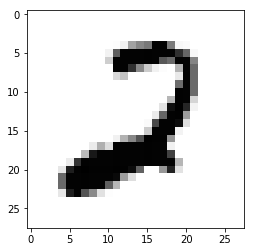

In [11]:
image_index = 5820

plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_loaded.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted value", pred.argmax(), pred)